# Import libraries

In [73]:
# ! pip install faker

In [74]:
import pandas as pd
import numpy as np
import random

from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import seaborn as sns
from random import randint, uniform
from faker.providers import BaseProvider
import matplotlib.pyplot as plt 

In [75]:
faker = Faker()
start_date = datetime.strptime("2005-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

In [76]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Customer data

In [77]:


class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a faker Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

faker.add_provider(CameroonPhoneProvider)

cam_phone_number = faker.phone_number()


In [78]:
customers_list = []
for i in tqdm(range(10000)):
    first_name = faker.first_name()
    last_name = faker.last_name()
    domain = faker.domain_name()
    email = f"{first_name.upper}.{last_name.upper}@{domain}"
    phone_number = cam_phone_number
    registration_date = faker.date_between(start_date, end_date)
    date_of_birth = faker.date_of_birth(minimum_age=30, maximum_age=75)
    address = faker.address()
    city = random.choice(["Yaoundé", "Douala", "Bafoussam", "Dschang", "Garoua", "Maroua", "Bamenda", "Ngaoundéré", "Nkongsamba", "Limbe", "Bertoua", "Mbouda", "Guider","Foumban", "Tibati", "Buea", "Kumba", "Kribi", "Loum", "Nkambe","Bangangté", "Baham", "Ndikiniméki", "Wum", "Batouri", "Yokadouma", "Mindif", "Meigang", "Abong-Mbang", "Bertoua", "Bogo", "Dir", "Poli", "Mbouda", "Bakoum", "Ngaoundal", "Figuil", "Mayo-Darlé", "Mayo-Rey", "Betaré-Oya", "Guidiguis", "Minjibir", "Mbankomo", "Ntui", "Mengang", "Akonolinga", "Ebolowa", "Abé", "Sangmélima", "Oveng", "Bipindi", "Meyomessé",])
    region = random.choice(["Nord", "Sud", "Est", "Ouest", "Centre", "Littoral", "Adamaoua", "Nord-ouest", "Sud-ouest", "Extrème-nord"])

    date_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        'city': city,
        'region' : region
        }
    customers_list.append(date_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)
customer_df.head()

 74%|███████▎  | 7366/10000 [00:52<00:18, 140.53it/s]


KeyboardInterrupt: 

In [ ]:
customer_df.to_csv('../Data/Train/customers.csv')

## Device data

In [79]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette', 'cellulaire'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= faker.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

  0%|          | 341/100000 [00:00<00:29, 3404.56it/s]

100%|██████████| 100000/100000 [00:26<00:00, 3764.22it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,20aa6b55-09fe-4fcf-9e7a-1004dd3d7fde,mobile,windows,SONY,Xperia 5 II,2024-02-22 06:50:26
1,288e57bf-f4d5-4b7a-887a-8e9672f2fcf4,mobile,android,dell,XPS 13,2021-04-21 03:38:47
2,60a15a64-7485-4425-8684-d97d2bef2305,tablette,ios,Sharp,aquos sense 5g,2020-11-22 12:53:54
3,40a50a7d-fb6e-485a-91f4-72eb2f897e1c,tablette,linux,LG,envy45,2023-03-13 21:33:29
4,60bf587e-8ee8-4a5c-838d-9456805f130d,cellulaire,linux,dell,INSPIRON 15,2022-06-03 02:47:41
...,...,...,...,...,...,...
99995,b672a0df-a3ea-421d-ba3e-b07bb4f367be,mobile,linux,HP,pavillon 15,2022-02-01 08:20:11
99996,41901ac5-07dd-4724-a309-0495c5f05ed2,mobile,ios,SONY,Xperia 5 II,2023-05-04 10:59:59
99997,0241734c-92d9-45ee-921c-72213fb596f8,cellulaire,mac,LG,envy45,2020-03-21 09:55:26
99998,3736997c-9edd-46ec-8cd2-37897d4485dd,tablette,android,dell,INSPIRON 15,2019-09-18 04:42:21


In [ ]:
devices.to_csv('../Data/Train/devices.csv')

## Transaction data

In [ ]:
transaction_list=[]
customer_id_list = customer_df["customer_id"]


for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choice(["retrait", "depôt", "transfert"])
    amount = uniform(100, 10000000)
    transaction_date = faker.date_between(start_date, end_date)
    location = faker.address()
    device_id = random.choice(devices["device_id"])
    status = random.choice(["échouée", "réussie"])
    is_fraud = random.choice([0,1])

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "transaction_type": transaction_type,
        "amount": amount,
        "transaction_date": transaction_date,
        "location": location,
        "device_id": device_id,
        "status": status,
        "is_fraud": is_fraud
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

In [ ]:
transaction_df.to_csv('../Data/Train/transactions.csv')

## Transaction history data

In [ ]:
transaction_history_list = []

for i, transaction in transaction_df.iterrows():
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

In [ ]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv')

## Transaction pattern data

In [ ]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

In [ ]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


In [ ]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv')

## alerts data

In [ ]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

In [ ]:
alerts.to_csv('../Data/Train/alerts.csv')

## fraude_cases data 

## UPDATE TRANSACTIONS DATA

In [ ]:

transaction_list=[]
customer_id_list = customer_df["customer_id"]

# ---------------------------------------------------------------------------------------------------------------------

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 1)

trend_factor = 1.0001
seasonal_amplitude = 0.3
seasonal_period = 365 
# ---------------------------------------------------------------------------------------------------------------------


for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choice(["retrait", "depôt", "transfert"])
# ---------------------------------------------------------------------------------------------------------------------
    # Calcul de la date de la transaction
    days_between = (end_date - start_date).days
    transaction_date = start_date + timedelta(days=random.randint(0, days_between))
    
    # Calcul de la tendance
    days_since_start = (transaction_date - start_date).days
    trend = trend_factor ** days_since_start
    
    # Calcul de la saisonnalité
    seasonal_effect = 1 + seasonal_amplitude * np.sin(2 * np.pi * days_since_start / seasonal_period)
    
    # Montant ajusté par la tendance et la saisonnalité
    base_amount = random.uniform(100, 10000000)
    amount = base_amount * trend * seasonal_effect
    
# ---------------------------------------------------------------------------------------------------------------------

    location = faker.address()
    device_id = random.choice(devices["device_id"])
    status = random.choice(["échouée", "réussie"])
    is_fraud = random.choice([0,1])

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "transaction_type": transaction_type,
        "amount": amount,
        "transaction_date": transaction_date,
        "location": location,
        "device_id": device_id,
        "status": status,
        "is_fraud": is_fraud
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

100%|██████████| 100000/100000 [05:12<00:00, 320.20it/s]


(100000, 9)


,transaction_id,customer_id,transaction_type,amount,transaction_date,location,device_id,status,is_fraud
0,545cc1dc453e411e9ad73977c9fa291f,e0694d9f75364bdeab2f4003ee48fdfe,transfert,38674.489378,2021-06-22,"PSC 5400, Box 8805\nAPO AP 93645",da5b0b4b-b45c-46bf-8839-987c2883b92c,échouée,1
1,943d2c6add8a4fe58129285ce42c9a6b,eddfe9ac55a044c9a6ffa006494ba186,retrait,27281.704929,2018-05-01,"1813 Travis Drive Apt. 493\nKristenhaven, AL 4...",e7d23c95-1f51-4c72-b403-fe1eafa45e94,échouée,0
2,a3d04c702f834b3e8854c05153b543d7,2828d780e40e4af78c07505e75573e7a,depôt,44447.980754,2023-02-12,"56505 Williams Extension\nPort Audrey, OK 11133",e77f1c23-e39f-4add-863d-ada21c181f64,réussie,0
3,2afd4d9840874c1faffbbbff168f1f74,e52de532569542eda3ca43f8daa6017f,retrait,98670.937745,2019-03-19,1449 Combs Passage Suite 379\nWest Patriciafor...,8012fdb2-7349-4356-a8b1-f81be48b1e7e,échouée,1
4,3ed512fd3af44465b6856f74b2ce29a3,310e2f58ccb64c548eae1666f6189a57,transfert,66219.295372,2019-08-01,"482 Daniel Vista Apt. 060\nLake Francisco, ID ...",5da5d4dc-4b61-44f2-b1c1-53085b913b7f,réussie,1


C:\Users\hp\AppData\Local\Temp\ipykernel_14552\1057737474.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='transaction_date', y='amount', data=transaction_df, ci=None)


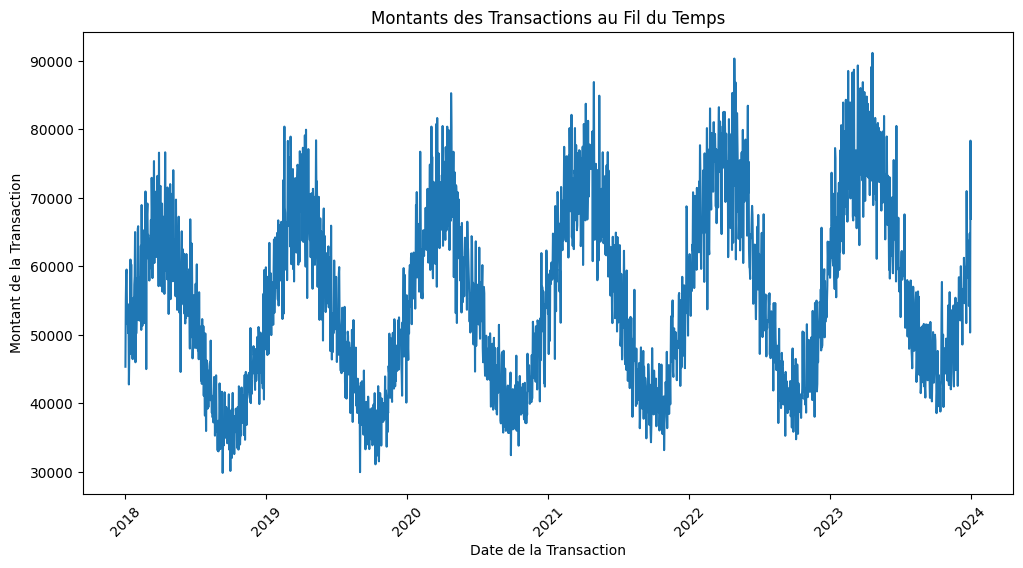

In [ ]:
plt.figure(figsize=(12, 6))

# Tracer les montants des transactions au fil du temps
sns.lineplot(x='transaction_date', y='amount', data=transaction_df, ci=None)
plt.title('Montants des Transactions au Fil du Temps')
plt.xlabel('Date de la Transaction')
plt.ylabel('Montant de la Transaction')
plt.xticks(rotation=45)
plt.show()